# Project 2
*Name : Sufyan Qadir*

## Introduction
This report describes the results of a data analysis project on the 2022 Australian Open. The project involved the acquisition, cleaning, preprocessing, feature engineering, model development, and evaluation of data from the tournament.

## Data Models and Methods
### Data Acquisition
To merge the data from project two with additional information, we used a Python script (Task 1) that leveraged the requests and BeautifulSoup libraries to scrape data from the Tennis Explorer website. The script followed a systematic approach of iterating over a range of years (2013-2023), requesting the ATP men's tournaments' calendars for each year from the website, and then parsing the response to extract essential information such as date, tournament name, player name, country, age, height in centimetres, weight in kilograms, and plays (singles or doubles). We then appended this information to a list, which was returned at the end of the script.
### Feature Engineering and Modelling
We first explored the correlation between numerical data and research questions (Task 2.1).
* Does the weight of a tennis player affect their performance?
* Can we predict the winner of a tennis match using features such as the playing surface, player ranks, and physical characteristics of the players?
* Can we cluster tennis players based on their playing style and performance metrics?
* Does the age of a tennis player affect their performance?
* What is the average weight and height of a tennis player?
* What is the distribution of weights and heights of tennis players?
* Is there a correlation between the weight and height of a tennis player and their ranking?
* Do players who are heavier or taller tend to win more matches?
  
We then generate new features based on the data, using domain knowledge and data science techniques. For example, we can generate features that capture the player's physical characteristics, such as height, weight, and BMI. Furthermore, we will analyse the first three questions by developing regression and kNN regressor models to predict outcomes based on the data. We will also use classification and clustering analysis to group similar data points together. We can also use clustering to group players into different skill levels, such as beginners, intermediate players, and advanced players. We will evaluate the performance of the developed models using appropriate metrics and techniques. For example, we can use the mean squared error (MSE) to evaluate the performance of a regression model. We can also use the accuracy score to evaluate the performance of a classification model.


## Discussion Based on Results
### Can we predict the winner of a tennis match using features such as the playing surface, player ranks, and physical characteristics of the players? (Task 3.1)
By looking at figure 3.1, The weight of a tennis player can affect their performance, but the relationship is complex and depends on a number of factors, including the player's height, age, gender, and playing style. All of the models have low R squared values but significant p values. This suggests that the models are not very accurate, but they are statistically significant. Based on the model's accuracy, it is unlikely that weight is a significant factor in predicting a player's performance. Other additional factors (which are not included in this dataframe), such as fitness, technique, and mental toughness, are likely to be more important.

### Can we predict the winner of a tennis match using features such as the playing surface, player ranks, and physical characteristics of the players? (Task 3.2)
Based on the very low accuracy score of 2%, the model cannot accurately predict the winner of a tennis match solely based on the surface type. This is likely because there are many other factors that play a more critical role in determining the outcome of a tennis match, such as player rankings, match stats, and BMI. By adding these features to the model, the accuracy increases to 87%, which is a significant improvement. This suggests that the additional features included in the model are useful predictors for determining the outcome of a tennis match. Based on this inference, we can conclude that including these features can improve the accuracy of the classification model for predicting tennis match outcomes.

### Can we cluster tennis players based on their playing style and performance metrics? (Task 3.3)
Initially, we tested out cluster 3. Based on the silhouette score of 0.7, there is a moderate level of clustering tendency in the tennis player data, indicating that it may be possible to cluster tennis players based on their playing style and performance metrics. We later checked from 1 to 9 clusters and visually analysed the within-cluster sum of squares (WSS). The drop in the WSS is largest between 1, 2, and 3, which means that the clusters are becoming more distinct and well-defined, which is generally desirable.

## Code and Results

### Data From Previous Project

In [1]:
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import rcParams
import os
import re
from datetime import datetime 
import requests
from bs4 import BeautifulSoup
import re
from datetime import datetime
import seaborn as sns
import scipy
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


In [2]:
# read the excel file into a pandas DataFrame
df = pd.read_excel('combined_data.xlsx', sheet_name='Sheet1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24755 entries, 0 to 24754
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         24755 non-null  int64         
 1   Location    24755 non-null  object        
 2   Tournament  24755 non-null  object        
 3   Date        24755 non-null  datetime64[ns]
 4   Series      24755 non-null  object        
 5   Court       24755 non-null  object        
 6   Surface     24755 non-null  object        
 7   Round       24755 non-null  object        
 8   Best of     24740 non-null  float64       
 9   Winner      24755 non-null  object        
 10  Loser       24755 non-null  object        
 11  WRank       24745 non-null  float64       
 12  LRank       24701 non-null  float64       
 13  WPts        24746 non-null  float64       
 14  LPts        24701 non-null  float64       
 15  W1          24590 non-null  float64       
 16  L1          24593 non-

In [3]:
# sort the DataFrame by Date
df = df.sort_values('Date')

# check that the data is in order by Date
df.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,filename
2309,56,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3.0,Tomic B.,...,4.50,1.18,5.47,1.14,5.50,1.22,5.50,1.16,4.95,2013.xlsx
2343,57,Tokyo,Rakuten Japan Open Tennis Championships,2012-10-01,ATP500,Outdoor,Hard,1st Round,3.0,Nieminen J.,...,2.20,1.70,2.27,1.62,2.25,1.73,2.38,1.64,2.20,2013.xlsx
2342,57,Tokyo,Rakuten Japan Open Tennis Championships,2012-10-01,ATP500,Outdoor,Hard,1st Round,3.0,Tsonga J.W.,...,2.62,1.53,2.66,1.44,2.75,1.55,2.85,1.47,2.63,2013.xlsx
2341,57,Tokyo,Rakuten Japan Open Tennis Championships,2012-10-01,ATP500,Outdoor,Hard,1st Round,3.0,Dolgopolov O.,...,2.50,1.53,2.66,1.57,2.38,1.60,2.66,1.52,2.47,2013.xlsx
2315,56,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3.0,Gasquet R.,...,3.40,1.36,3.43,1.29,3.50,1.36,3.80,1.29,3.46,2013.xlsx


In [4]:
df = df.drop('filename', axis=1)

In [5]:
df.isna()
#check for missing values
df.isna().sum()

ATP               0
Location          0
Tournament        0
Date              0
Series            0
Court             0
Surface           0
Round             0
Best of          15
Winner            0
Loser             0
WRank            10
LRank            54
WPts              9
LPts             54
W1              165
L1              162
W2              371
L2              371
W3            12803
L3            12803
W4            22317
L4            22317
W5            23844
L5            23844
Wsets           165
Lsets           168
Comment           0
B365W            94
B365L            90
EXW            9087
EXL            9082
LBW            9820
LBL            9815
PSW             119
PSL             119
SJW           19659
SJL           19659
MaxW             17
MaxL             17
AvgW             17
AvgL             17
dtype: int64

In [6]:
df.dropna(how='all')

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,LBW,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
2309,56,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3.0,Tomic B.,...,1.17,4.50,1.18,5.47,1.14,5.50,1.22,5.50,1.16,4.95
2343,57,Tokyo,Rakuten Japan Open Tennis Championships,2012-10-01,ATP500,Outdoor,Hard,1st Round,3.0,Nieminen J.,...,1.62,2.20,1.70,2.27,1.62,2.25,1.73,2.38,1.64,2.20
2342,57,Tokyo,Rakuten Japan Open Tennis Championships,2012-10-01,ATP500,Outdoor,Hard,1st Round,3.0,Tsonga J.W.,...,1.44,2.62,1.53,2.66,1.44,2.75,1.55,2.85,1.47,2.63
2341,57,Tokyo,Rakuten Japan Open Tennis Championships,2012-10-01,ATP500,Outdoor,Hard,1st Round,3.0,Dolgopolov O.,...,1.50,2.50,1.53,2.66,1.57,2.38,1.60,2.66,1.52,2.47
2315,56,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3.0,Gasquet R.,...,1.30,3.40,1.36,3.43,1.29,3.50,1.36,3.80,1.29,3.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24750,68,Turin,Masters Cup,2022-11-18,Masters Cup,Indoor,Hard,Round Robin,NaN,Djokovic N.,...,NaN,NaN,1.37,3.36,NaN,NaN,1.39,3.55,1.34,3.25
24751,68,Turin,Masters Cup,2022-11-18,Masters Cup,Indoor,Hard,Round Robin,NaN,Rublev A.,...,NaN,NaN,2.63,1.55,NaN,NaN,2.63,1.63,2.39,1.57
24752,68,Turin,Masters Cup,2022-11-19,Masters Cup,Indoor,Hard,Semifinals,NaN,Djokovic N.,...,NaN,NaN,1.24,4.53,NaN,NaN,1.28,4.75,1.23,4.14
24753,68,Turin,Masters Cup,2022-11-19,Masters Cup,Indoor,Hard,Semifinals,NaN,Ruud C.,...,NaN,NaN,2.35,1.67,NaN,NaN,2.35,1.75,2.18,1.69


In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df = df.fillna(0) #the values which cannot be replaced by mean just fill them with 0
df.isna().sum()


ATP           0
Location      0
Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Winner        0
Loser         0
WRank         0
LRank         0
WPts          0
LPts          0
W1            0
L1            0
W2            0
L2            0
W3            0
L3            0
W4            0
L4            0
W5            0
L5            0
Wsets         0
Lsets         0
Comment       0
B365W         0
B365L         0
EXW           0
EXL           0
LBW           0
LBL           0
PSW           0
PSL           0
SJW           0
SJL           0
MaxW          0
MaxL          0
AvgW          0
AvgL          0
dtype: int64

In [8]:
mask = (df['Date'].dt.year == 2012) | (df['Date'].dt.year == 2023)

# drop rows based on the mask
df.drop(df.loc[mask].index, inplace=True)

In [9]:
df['OverallSequence'] = df.groupby('ATP').ngroup() + 1
df

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,OverallSequence
36,2,Chennai,Chennai Open,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.000000,Devvarman S.,...,2.62000,1.54,2.62,1.730000,2.000000,1.73,3.15,1.48,2.57,2
61,3,Doha,Qatar Exxon Mobil Open,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.000000,Rosol L.,...,3.00000,1.44,2.98,1.330000,3.000000,1.44,3.25,1.36,3.02,3
4,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.000000,Istomin D.,...,1.80000,1.88,2.00,1.910000,1.800000,2.05,2.00,1.88,1.85,1
5,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.000000,Millman J.,...,2.00000,1.70,2.27,1.800000,1.910000,1.85,2.28,1.71,2.08,1
6,1,Brisbane,Brisbane International,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.000000,Falla A.,...,1.80000,2.26,1.70,2.000000,1.730000,2.32,1.83,2.08,1.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24750,68,Turin,Masters Cup,2022-11-18,Masters Cup,Indoor,Hard,Round Robin,3.399677,Djokovic N.,...,3.45067,1.37,3.36,1.827569,3.570038,1.39,3.55,1.34,3.25,68
24751,68,Turin,Masters Cup,2022-11-18,Masters Cup,Indoor,Hard,Round Robin,3.399677,Rublev A.,...,3.45067,2.63,1.55,1.827569,3.570038,2.63,1.63,2.39,1.57,68
24752,68,Turin,Masters Cup,2022-11-19,Masters Cup,Indoor,Hard,Semifinals,3.399677,Djokovic N.,...,3.45067,1.24,4.53,1.827569,3.570038,1.28,4.75,1.23,4.14,68
24753,68,Turin,Masters Cup,2022-11-19,Masters Cup,Indoor,Hard,Semifinals,3.399677,Ruud C.,...,3.45067,2.35,1.67,1.827569,3.570038,2.35,1.75,2.18,1.69,68


### Task 1

- We start by going through a range of years and filter out the players e.g. (https://www.tennisexplorer.com/calendar/atp-men/year/)
- We then request page of each player and filter out their information e.g. (https://www.tennisexplorer.com/player/altmaier/)
- I have saved the scrapped data in an excel file so that it can easily be accessed
- Note: I made sure to exclude any null values

*Note: Compilation for each year takes around 6 minutes, hence 10 years of data shall take approx 1 hour* 

In [10]:
# scrapped_data=[]

# for i in range(2013, 2023):
#     year = str(i)
#     url = "https://www.tennisexplorer.com/calendar/atp-men/year/"
#     response = requests.get(url.replace('year', year))
#     try:
#         response.raise_for_status()  # check for any errors in the response
#         scrapping = response.content
#         page = BeautifulSoup(scrapping, "lxml")
#         tr_tags = page.find_all("tr")
#         # count = 0  # initialize the counter
#         for tr in tr_tags:
#             tor = tr.find('strong')
#             date = tr.find('td', 'first shortdate')
#             name = tr.find('td', 't-name')
#             if (tor != None and date != None and name != None):
#                 html_string = str(name)
#                 href = re.search(r'href="([^"]+)"', html_string).group(1)
#                 url = "https://www.tennisexplorer.com/" + href
#                 response = requests.get(url)
#                 try:
#                     response.raise_for_status()  # check for any errors in the response
#                     scrapping = response.content
#                     page = BeautifulSoup(scrapping, "lxml")
#                     td = page.findAll(name='td')[1]
#                     string = td.text.replace('Country', '\nCountry').replace('Height / Weight', '\nHeight / Weight').replace(
#                         'Age', '\nAge').replace('Current/Highest rank - singles',
#                                                 '\nCurrent/Highest rank - singles').replace(
#                         'Current/Highest rank - doubles', '\nCurrent/Highest rank - doubles').replace('Sex', '\nSex').replace(
#                         'Plays', '\nPlays')
#                     # Split the string into lines
#                     lines = string.splitlines()

#                     # Extract the required data
#                     data = {}
#                     data['date'] = date.text
#                     data['name'] = name.text
#                     data['tournament'] = tor.text
#                     for line in lines[1:]:
#                         if 'Country:' in line:
#                             data['country'] = line.split(': ')[1]
#                         elif 'Age:' in line:
#                             data['age'] = line.split(': ')[1]
#                         elif 'Plays:' in line:
#                             data['plays'] = line.split(': ')[1]
#                         elif 'Height / Weight:' in line:
#                             substrings = line.split(':')
#                             height_weight = substrings[1].strip()
#                             height, weight = height_weight.split('/')
#                             height = ''.join(filter(str.isdigit, height))
#                             weight = ''.join(filter(str.isdigit, weight))
#                             height = int(height)
#                             weight = int(weight)
#                             data['height in cm'] = height
#                             data['weight in kg'] = weight
                    
#                     try:
#                         player_data=[data['date'],data['name'],data['tournament'],data['country'],data['age'],data['height in cm'],data['weight in kg'],data['plays']]
#                         scrapped_data.append(player_data)
#                         print(player_data)
#                     except:
#                         print("some null values")

#                     # count += 1  # increment the counter
#                     # if count == 1:  # check if the counter reaches 40
#                     #     break  # break the loop
#                 except requests.exceptions.HTTPError as e:
#                     print(f"Error occurred while getting data for {url}: {e}")
#     except requests.exceptions.HTTPError as e:
#         print(f"Error occurred while getting data for {url}: {e}")


In [11]:
# data=pd.DataFrame(scrapped_data, columns = ['date','name','tournament','country','age','height in cm','weight in kg','plays'])

In [12]:
# data.to_excel('s_data.xlsx', index=False)

In [13]:
# data.to_excel('s_data.xlsx', index=False)

Clean and integrate additional data: Once you have obtained the additional data, clean and preprocess it, and integrate it into the original dataset. This can be done by merging the datasets based on common fields such as player names or match dates. Validate the data. Check that the combined dataset is free of errors and inconsistencies and that it has the necessary variables for your analysis.

In [14]:
players_df=pd.read_excel('s_data.xlsx')

In [15]:
players_df.head()

,date,name,tournament,country,age,height in cm,weight in kg,plays
0,20.12.2013,Johnson S.,AO Wildcard Playoff - USA,USA,33 (24. 12. 1989),188,86,right
1,10.12.2013,Thompson J.,AO Wildcard Playoff - Australia,Australia,29 (20. 4. 1994),183,82,right
2,20.11.2013,Wu D.,AO WC Playoff - Asia-Pacific,China,31 (14. 9. 1991),173,65,right
3,18.11.2013,Ebden M.,Toyota challenger,Australia,35 (26. 11. 1987),188,80,right
4,18.11.2013,Golubev A.,Tyumen challenger,Kazakhstan,35 (22. 7. 1987),183,79,right


In [16]:
players_df.tail()

,date,name,tournament,country,age,height in cm,weight in kg,plays
2177,04.01.2022,Nadal R.,Melbourne Summer Set 1,Spain,36 (3. 6. 1986),185,85,left
2178,03.01.2022,Monfils G.,Adelaide,France,36 (1. 9. 1986),193,85,right
2179,03.01.2022,Escobedo E.,Bendigo challenger,Mexico,26 (4. 7. 1996),185,82,right
2180,03.01.2022,Machac T.,Traralgon chall.,Czech Republic,22 (13. 10. 2000),183,73,right
2181,03.01.2022,Rodriguez Taverna S.,Buenos Aires 3 chall.,Argentina,23 (16. 7. 1999),191,82,right


In [17]:
def cleanAge(x):
    # Regular expression pattern to match the string inside brackets
    pattern = r'(?<=\()[^\)]+(?=\))'

    # Use re.search to find the first occurrence of the pattern in the string
    match = re.search(pattern, x)

    # Extract the matched string from the match object
    matched_string = match.group(0)
    date_object = pd.to_datetime(matched_string, format='%d. %m. %Y')
    return date_object




In [18]:
def cleanDate(x):
    date_object = pd.to_datetime(x, format='%d.%m.%Y')
    return date_object

In [19]:
players_df['age'] = players_df['age'].apply(cleanAge)
players_df.head()

,date,name,tournament,country,age,height in cm,weight in kg,plays
0,20.12.2013,Johnson S.,AO Wildcard Playoff - USA,USA,1989-12-24,188,86,right
1,10.12.2013,Thompson J.,AO Wildcard Playoff - Australia,Australia,1994-04-20,183,82,right
2,20.11.2013,Wu D.,AO WC Playoff - Asia-Pacific,China,1991-09-14,173,65,right
3,18.11.2013,Ebden M.,Toyota challenger,Australia,1987-11-26,188,80,right
4,18.11.2013,Golubev A.,Tyumen challenger,Kazakhstan,1987-07-22,183,79,right


In [20]:
players_df['date'] = players_df['date'].apply(cleanDate)
players_df

,date,name,tournament,country,age,height in cm,weight in kg,plays
0,2013-12-20,Johnson S.,AO Wildcard Playoff - USA,USA,1989-12-24,188,86,right
1,2013-12-10,Thompson J.,AO Wildcard Playoff - Australia,Australia,1994-04-20,183,82,right
2,2013-11-20,Wu D.,AO WC Playoff - Asia-Pacific,China,1991-09-14,173,65,right
3,2013-11-18,Ebden M.,Toyota challenger,Australia,1987-11-26,188,80,right
4,2013-11-18,Golubev A.,Tyumen challenger,Kazakhstan,1987-07-22,183,79,right
...,...,...,...,...,...,...,...,...
2177,2022-01-04,Nadal R.,Melbourne Summer Set 1,Spain,1986-06-03,185,85,left
2178,2022-01-03,Monfils G.,Adelaide,France,1986-09-01,193,85,right
2179,2022-01-03,Escobedo E.,Bendigo challenger,Mexico,1996-07-04,185,82,right
2180,2022-01-03,Machac T.,Traralgon chall.,Czech Republic,2000-10-13,183,73,right


In [45]:
players_df = players_df[['name', 'age', 'country','height in cm','weight in kg','plays']]

In [46]:
# Check for duplicates in tournament data
print(df.duplicated().sum())

# Check for duplicates in player information data
print(players_df.duplicated().sum())

# Remove duplicates from both dataframes
df = df.drop_duplicates()
players_df = players_df.drop_duplicates()


0
0


In [56]:
# Merge tournament data with player information data using inner join
merged_df = pd.merge(df, players_df, left_on='Winner',right_on='name',how='inner')
merged_data = pd.merge(merged_df, players_df, left_on='Loser', right_on='name', suffixes=('_Winner', '_Loser'))

In [57]:
merged_data.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'EXW', 'EXL', 'LBW', 'LBL', 'PSW',
       'PSL', 'SJW', 'SJL', 'MaxW', 'MaxL', 'AvgW', 'AvgL', 'OverallSequence',
       'name_Winner', 'age_Winner', 'country_Winner', 'height in cm_Winner',
       'weight in kg_Winner', 'plays_Winner', 'name_Loser', 'age_Loser',
       'country_Loser', 'height in cm_Loser', 'weight in kg_Loser',
       'plays_Loser'],
      dtype='object')

In [58]:
merged_data = merged_data.drop(['name_Winner','name_Loser'],axis=1)

In [59]:
print(merged_data.duplicated().sum())

0


In [60]:
merged_data.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,age_Winner,country_Winner,height in cm_Winner,weight in kg_Winner,plays_Winner,age_Loser,country_Loser,height in cm_Loser,weight in kg_Loser,plays_Loser
0,2,Chennai,Chennai Open,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Devvarman S.,...,1985-02-13,India,180,73,right,1983-08-07,Czech Republic,180,80,right
1,45,Umag,ATP Vegeta Croatia Open,2013-07-23,ATP250,Outdoor,Clay,1st Round,3.0,Robredo T.,...,1982-05-01,Spain,180,75,right,1983-08-07,Czech Republic,180,80,right
2,30,Dusseldorf,Power Horse Cup,2013-05-23,ATP250,Outdoor,Clay,Quarterfinals,3.0,Sijsling I.,...,1987-08-18,Netherlands,191,85,right,1983-08-07,Czech Republic,180,80,right
3,32,Paris,French Open,2013-05-29,Grand Slam,Outdoor,Clay,2nd Round,5.0,Querrey S.,...,1987-10-07,USA,198,95,right,1983-08-07,Czech Republic,180,80,right
4,46,Kitzbuhel,Bet-At-Home Cup,2013-07-31,ATP250,Outdoor,Clay,2nd Round,3.0,Gimeno-Traver D.,...,1985-08-07,Spain,183,80,right,1983-08-07,Czech Republic,180,80,right


In [61]:
merged_data.tail()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,age_Winner,country_Winner,height in cm_Winner,weight in kg_Winner,plays_Winner,age_Loser,country_Loser,height in cm_Loser,weight in kg_Loser,plays_Loser
19059,33,'s-Hertogenbosch,Rosmalen Grass Court Championships,2022-06-07,ATP250,Outdoor,Grass,1st Round,3.0,Brooksby J.,...,2000-10-26,USA,188,82,right,2000-05-31,Netherlands,180,70,right
19060,46,Umag,Croatia Open,2022-07-30,ATP250,Outdoor,Clay,Semifinals,3.0,Sinner J.,...,2001-08-16,Italy,188,76,right,1993-04-15,Italy,188,82,right
19061,24,Sardinia,Forte Village Sardegna Open,2020-10-15,ATP250,Outdoor,Clay,2nd Round,3.0,Musetti L.,...,2002-03-03,Italy,185,75,right,1997-03-23,Italy,185,81,right
19062,54,San Diego,San Diego Open,2022-09-19,ATP250,Outdoor,Hard,1st Round,3.0,Etcheverry T.,...,1999-07-18,Argentina,196,82,right,1992-09-22,Argentina,183,78,right
19063,55,Seoul,Korea Open,2022-09-26,ATP250,Outdoor,Hard,1st Round,3.0,Uchida K.,...,1994-08-23,Japan,180,74,right,1997-06-30,South Korea,175,65,right


### TASK 2.1

Lets check for any relationships

In [62]:
numerical_columns = merged_data.select_dtypes(include=['number'])
corr = numerical_columns.corr()
n = 20  # number of rows and columns to check at a time

for i in range(0, len(corr), n):
    for j in range(0, len(corr.columns), n):
        corr_subset = corr.iloc[i:i+n, j:j+n]
        display(corr_subset)

,ATP,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,B365W,B365L
ATP,1.000000,-0.044013,-0.045179,-0.047490,0.031989,0.063326,0.003495,0.018811,0.002198,0.005123,0.007790,0.000953,-0.011907,-0.012947,-0.008956,-0.004565,-0.043597,-0.007100,0.002745,-0.032856
Best of,-0.044013,1.000000,-0.082610,0.015873,0.133189,0.002002,-0.013146,-0.019339,-0.021899,0.022319,-0.212937,0.099567,-0.003986,-0.004477,-0.000610,0.001058,0.855731,0.230700,-0.010141,0.263885
WRank,-0.045179,-0.082610,1.000000,0.105616,-0.451157,-0.121207,-0.050703,0.059038,-0.030828,0.036419,0.003791,0.015430,-0.012818,-0.003107,-0.002056,-0.002046,-0.093108,0.055846,0.270282,-0.284778
LRank,-0.047490,0.015873,0.105616,1.000000,-0.129218,-0.415961,0.007735,-0.035463,0.017783,-0.043390,0.006726,-0.029788,0.008737,-0.014054,-0.006507,-0.009803,0.020467,-0.036339,-0.200312,0.149589
WPts,0.031989,0.133189,-0.451157,-0.129218,1.000000,0.224346,0.035475,-0.101327,0.045293,-0.077619,-0.002999,-0.042115,0.016199,-0.014412,0.000084,-0.007011,0.133989,-0.075872,-0.224363,0.606982
LPts,0.063326,0.002002,-0.121207,-0.415961,0.224346,1.000000,-0.025646,0.047936,-0.020277,0.059039,-0.004856,0.037710,0.001426,0.027925,0.016449,0.014841,-0.004205,0.064887,0.421558,-0.150026
W1,0.003495,-0.013146,-0.050703,0.007735,0.035475,-0.025646,1.000000,-0.180692,-0.119296,0.063973,-0.062030,0.028113,-0.004633,0.011082,-0.001859,-0.003024,0.035585,-0.425032,-0.060847,0.043960
L1,0.018811,-0.019339,0.059038,-0.035463,-0.101327,0.047936,-0.180692,1.000000,0.096745,0.030316,0.056450,0.001714,0.004155,0.000758,0.006437,0.005354,0.004646,0.381743,0.094286,-0.161066
W2,0.002198,-0.021899,-0.030828,0.017783,0.045293,-0.020277,-0.119296,0.096745,1.000000,-0.142876,-0.063220,0.026124,-0.011556,0.026540,0.006245,0.007751,0.052531,-0.373768,-0.050230,0.053822
L2,0.005123,0.022319,0.036419,-0.043390,-0.077619,0.059039,0.063973,0.030316,-0.142876,1.000000,0.050374,0.018973,0.020375,-0.007331,0.002072,0.004317,0.062722,0.370788,0.096167,-0.127486


,EXL,LBW,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,OverallSequence,height in cm_Winner,weight in kg_Winner,height in cm_Loser,weight in kg_Loser
ATP,-0.031511,0.011349,-0.028638,0.006913,-0.031714,0.010557,-0.025430,0.005042,0.007095,0.003138,-0.031980,1.000000,0.026251,0.017456,0.022454,0.021243
Best of,0.200652,-0.021467,0.202375,-0.021566,0.266399,-0.006379,0.106462,-0.016255,0.023434,-0.024723,0.281279,-0.044013,0.007433,0.021897,-0.007168,-0.001292
WRank,-0.274384,0.247957,-0.239231,0.280714,-0.278768,0.135134,-0.138114,0.270267,-0.010499,0.210129,-0.315757,-0.045179,-0.096469,-0.098895,-0.024681,-0.018122
LRank,0.144195,-0.177698,0.122918,-0.205458,0.143141,-0.097842,0.066036,-0.195849,-0.001324,-0.155077,0.168320,-0.047490,-0.014161,-0.004595,-0.098093,-0.074617
WPts,0.523720,-0.225961,0.516559,-0.252385,0.603145,-0.140965,0.322029,-0.239262,0.011759,-0.189634,0.633932,0.031989,0.050648,0.082377,0.035610,0.029868
LPts,-0.141179,0.367283,-0.118152,0.451542,-0.146176,0.219359,-0.075480,0.441557,-0.004043,0.312326,-0.168629,0.063326,0.036523,0.028422,0.106515,0.106680
W1,0.040939,-0.045371,0.033907,-0.063849,0.043617,-0.021885,0.014494,-0.060161,0.002118,-0.047030,0.050007,0.003495,0.063544,0.067242,0.033389,0.029807
L1,-0.132898,0.089417,-0.128236,0.106267,-0.159737,0.042230,-0.075390,0.102353,-0.005621,0.075227,-0.169219,0.018811,0.051352,0.052120,0.095861,0.101026
W2,0.053452,-0.046380,0.048174,-0.050828,0.054023,-0.012462,0.030498,-0.046926,-0.014162,-0.032563,0.058757,0.002198,0.042683,0.041742,0.013063,0.016816
L2,-0.107834,0.079867,-0.096343,0.097852,-0.123435,0.040319,-0.061692,0.094336,-0.001324,0.077543,-0.132956,0.005123,0.066401,0.067535,0.092079,0.082585


,ATP,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,B365W,B365L
EXL,-0.031511,0.200652,-0.274384,0.144195,0.523720,-0.141179,0.040939,-0.132898,0.053452,-0.107834,-0.011346,-0.051650,0.025109,-0.032108,-0.004352,-0.006593,0.194630,-0.098259,-0.334752,0.789164
LBW,0.011349,-0.021467,0.247957,-0.177698,-0.225961,0.367283,-0.045371,0.089417,-0.046380,0.079867,-0.021939,0.047627,-0.006751,0.031876,0.017473,0.023565,-0.051197,0.093738,0.774718,-0.297875
LBL,-0.028638,0.202375,-0.239231,0.122918,0.516559,-0.118152,0.033907,-0.128236,0.048174,-0.096343,-0.006644,-0.053753,0.021777,-0.030272,-0.003840,-0.005394,0.194505,-0.090418,-0.278267,0.816331
PSW,0.006913,-0.021566,0.280714,-0.205458,-0.252385,0.451542,-0.063849,0.106267,-0.050828,0.097852,-0.027909,0.061742,-0.007880,0.046440,0.017474,0.024604,-0.047711,0.122763,0.908882,-0.326076
PSL,-0.031714,0.266399,-0.278768,0.143141,0.603145,-0.146176,0.043617,-0.159737,0.054023,-0.123435,-0.014198,-0.078593,0.022928,-0.041789,-0.006699,-0.011595,0.247799,-0.110440,-0.274127,0.961000
SJW,0.010557,-0.006379,0.135134,-0.097842,-0.140965,0.219359,-0.021885,0.042230,-0.012462,0.040319,-0.006809,0.024306,-0.015655,0.019049,0.012221,0.016846,-0.031136,0.036666,0.445838,-0.197436
SJL,-0.025430,0.106462,-0.138114,0.066036,0.322029,-0.075480,0.014494,-0.075390,0.030498,-0.061692,-0.003463,-0.039696,0.018428,-0.024714,-0.001372,-0.004002,0.109234,-0.049737,-0.173904,0.519373
MaxW,0.005042,-0.016255,0.270267,-0.195849,-0.239262,0.441557,-0.060161,0.102353,-0.046926,0.094336,-0.028347,0.060878,-0.006100,0.048375,0.017441,0.024594,-0.040857,0.119073,0.899340,-0.308805
MaxL,0.007095,0.023434,-0.010499,-0.001324,0.011759,-0.004043,0.002118,-0.005621,-0.014162,-0.001324,-0.008714,0.014164,0.003178,0.000632,-0.008537,-0.008443,0.021627,0.008998,-0.009212,0.022990
AvgW,0.003138,-0.024723,0.210129,-0.155077,-0.189634,0.312326,-0.047030,0.075227,-0.032563,0.077543,-0.018018,0.044463,-0.011181,0.030346,0.013189,0.018076,-0.042154,0.085984,0.616241,-0.248747


,EXL,LBW,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,OverallSequence,height in cm_Winner,weight in kg_Winner,height in cm_Loser,weight in kg_Loser
EXL,1.000000,-0.441342,0.899684,-0.340314,0.762997,-0.282337,0.580510,-0.321780,0.024082,-0.254671,0.788574,-0.031511,0.012334,0.052132,-0.067856,-0.073878
LBW,-0.441342,1.000000,-0.385674,0.832341,-0.282620,0.554636,-0.234449,0.827536,-0.011645,0.551425,-0.324796,0.011349,-0.039956,-0.056751,0.055718,0.071478
LBL,0.899684,-0.385674,1.000000,-0.282828,0.788924,-0.237453,0.567681,-0.268158,0.023126,-0.212005,0.784106,-0.028638,0.011471,0.045187,-0.060376,-0.065242
PSW,-0.340314,0.832341,-0.282828,1.000000,-0.317592,0.467820,-0.174180,0.987278,-0.009731,0.662634,-0.369147,0.006913,-0.057718,-0.061365,0.073103,0.075584
PSL,0.762997,-0.282620,0.788924,-0.317592,1.000000,-0.183348,0.488184,-0.299114,0.022977,-0.240907,0.969635,-0.031714,0.025648,0.058681,-0.074476,-0.066011
SJW,-0.282337,0.554636,-0.237453,0.467820,-0.183348,1.000000,-0.441958,0.475390,-0.002178,0.307373,-0.204531,0.010557,-0.014940,-0.026290,0.015650,0.029176
SJL,0.580510,-0.234449,0.567681,-0.174180,0.488184,-0.441958,1.000000,-0.169476,0.006083,-0.129943,0.482300,-0.025430,-0.004584,0.021866,-0.038092,-0.040696
MaxW,-0.321780,0.827536,-0.268158,0.987278,-0.299114,0.475390,-0.169476,1.000000,-0.009266,0.655525,-0.350853,0.005042,-0.056331,-0.059077,0.068345,0.070996
MaxL,0.024082,-0.011645,0.023126,-0.009731,0.022977,-0.002178,0.006083,-0.009266,1.000000,-0.007530,0.024021,0.007095,-0.003393,0.001284,-0.002917,-0.001211
AvgW,-0.254671,0.551425,-0.212005,0.662634,-0.240907,0.307373,-0.129943,0.655525,-0.007530,1.000000,-0.282292,0.003138,-0.028364,-0.034154,0.070226,0.073990


Research Questions 

* Does the weight of a tennis player affect their performance?
* Can we predict the winner of a tennis match using features such as the playing surface, player ranks, and physical characteristics of the players?
* Can we cluster tennis players based on their playing style and performance metrics?
* Does the age of a tennis player affect their performance?
* What is the average weight and height of a tennis player?
* What is the distribution of weights and heights of tennis players?
* Is there a correlation between the weight and height of a tennis player and their ranking?
* Do players who are heavier or taller tend to win more matches?


### Task 2.2

In [54]:
merged_data.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'EXW', 'EXL', 'LBW', 'LBL', 'PSW',
       'PSL', 'SJW', 'SJL', 'MaxW', 'MaxL', 'AvgW', 'AvgL', 'OverallSequence',
       'name_Winner', 'dob_Winner', 'country_Winner', 'height_Winner',
       'weight_Winner', 'plays_Winner', 'name_Loser', 'age_Loser',
       'country_Loser', 'height in cm_Loser', 'weight in kg_Loser',
       'plays_Loser', 'age_Winner'],
      dtype='object')

In [63]:
# Calculate the weight to height ratio.
merged_data['weight_to_height_ratio_Winner'] = merged_data['weight in kg_Winner'] / merged_data['height in cm_Winner']

In [64]:
merged_data['weight_to_height_ratio_Loser'] = merged_data['weight in kg_Loser'] / merged_data['height in cm_Loser']

In [65]:
# Calculate the body mass index (BMI).
merged_data['BMI_Loser'] = merged_data['weight in kg_Loser'] / (merged_data['height in cm_Loser'] / 100)**2
merged_data['BMI_Winner'] = merged_data['weight in kg_Winner'] / (merged_data['height in cm_Winner'] / 100)**2

In [66]:
merged_data.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,plays_Winner,age_Loser,country_Loser,height in cm_Loser,weight in kg_Loser,plays_Loser,weight_to_height_ratio_Winner,weight_to_height_ratio_Loser,BMI_Loser,BMI_Winner
0,2,Chennai,Chennai Open,2013-01-01,ATP250,Outdoor,Hard,1st Round,3.0,Devvarman S.,...,right,1983-08-07,Czech Republic,180,80,right,0.405556,0.444444,24.691358,22.530864
1,45,Umag,ATP Vegeta Croatia Open,2013-07-23,ATP250,Outdoor,Clay,1st Round,3.0,Robredo T.,...,right,1983-08-07,Czech Republic,180,80,right,0.416667,0.444444,24.691358,23.148148
2,30,Dusseldorf,Power Horse Cup,2013-05-23,ATP250,Outdoor,Clay,Quarterfinals,3.0,Sijsling I.,...,right,1983-08-07,Czech Republic,180,80,right,0.445026,0.444444,24.691358,23.299800
3,32,Paris,French Open,2013-05-29,Grand Slam,Outdoor,Clay,2nd Round,5.0,Querrey S.,...,right,1983-08-07,Czech Republic,180,80,right,0.479798,0.444444,24.691358,24.232221
4,46,Kitzbuhel,Bet-At-Home Cup,2013-07-31,ATP250,Outdoor,Clay,2nd Round,3.0,Gimeno-Traver D.,...,right,1983-08-07,Czech Republic,180,80,right,0.437158,0.444444,24.691358,23.888441


### TASK 3.1

Does the weight of a tennis player affect their performance?

linear regression polynomial

In [67]:
import statsmodels.formula.api as smf

Check summary

In [68]:
merged_data.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'EXW', 'EXL', 'LBW', 'LBL', 'PSW',
       'PSL', 'SJW', 'SJL', 'MaxW', 'MaxL', 'AvgW', 'AvgL', 'OverallSequence',
       'age_Winner', 'country_Winner', 'height in cm_Winner',
       'weight in kg_Winner', 'plays_Winner', 'age_Loser', 'country_Loser',
       'height in cm_Loser', 'weight in kg_Loser', 'plays_Loser',
       'weight_to_height_ratio_Winner', 'weight_to_height_ratio_Loser',
       'BMI_Loser', 'BMI_Winner'],
      dtype='object')

A low R^2 value indicates that the model does not capture a large portion of the variability in the data, typically less than 2% in this case. A p-value lower than 0.05 suggests that there is a low likelihood that the observed relationship between WPts and weight_Winner is due to chance, indicating a statistically significant association. However, a weak relationship between the two variables may be present, potentially explained by the influence of other factors on weight, such as height, age, and gender

plot 1st ,2nd and 3rd order polynomials

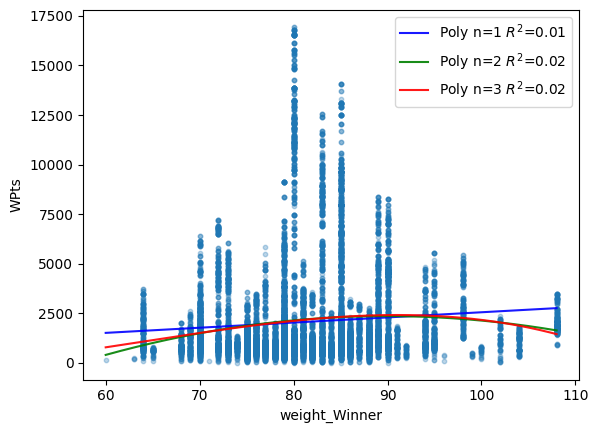

In [69]:

merged_data = merged_data.rename(columns={'weight in kg_Winner': 'weight_Winner'})
merged_data = merged_data.rename(columns={'height in cm_Winner': 'height_Winner'})
merged_data = merged_data.rename(columns={'age_Winner': 'dob_Winner'})
current_date = datetime.now()
merged_data['age_Winner'] = (current_date - merged_data['dob_Winner'])
merged_data['dob_Winner'] = merged_data['dob_Winner'].apply(lambda x: (current_date - x).days // 365.25)

x = pd.DataFrame({'weight_Winner': np.linspace(merged_data.weight_Winner.min(), merged_data.weight_Winner.max(), len(merged_data.weight_Winner)) })

plt.scatter( merged_data.weight_Winner, merged_data.WPts, s=10, alpha=0.3)
plt.xlabel('weight_Winner')
plt.ylabel('WPts')

# 1-st order polynomial
poly_1 = smf.ols(formula='WPts ~ 1 + weight_Winner', data=merged_data).fit()
plt.plot(x, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared,  alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='WPts ~ 1 + weight_Winner + I(weight_Winner ** 2.0)', data=merged_data).fit()
plt.plot(x, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='WPts ~ 1 + weight_Winner + I(weight_Winner ** 2.0) + I(weight_Winner ** 3.0)', data=merged_data).fit()
plt.plot(x, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)


plt.legend()

In [70]:
smf.ols(formula='WPts ~ 1 + weight_Winner', data=merged_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WPts   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     130.2
Date:                Fri, 12 May 2023   Prob (F-statistic):           4.55e-30
Time:                        12:38:20   Log-Likelihood:            -1.7585e+05
No. Observations:               19064   AIC:                         3.517e+05
Df Residuals:                   19062   BIC:                         3.517e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -50.3946    186.522     -0.270      0.787    -415.994     315.205
weight_Winner    25.9977      2.278     11.412      0.000      21.532      30.463
==============================================================================
Omnibus:                    10950.371   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82799.835
Skew:                           2.758   Prob(JB):                         0.00
Kurtosis:                      11.592   Cond. No.                         859.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
def stepwise_backwards_regression(response_var, exp_vars, df):
    while len(exp_vars) > 0:
        forml = response_var + ' ~ 1 +' + ' + '.join(exp_vars)
        print(forml)
        model = smf.ols(formula= forml, data=df).fit()

        sorted_ps = model.pvalues.sort_values(ascending=False).drop('Intercept')
        if (sorted_ps[0]) > 0.05:
            exp_vars = sorted_ps.index[1:].values
            drop = sorted_ps.index[0]
            print(str(len(exp_vars)) + ' var model AIC: ' + str(model.aic) + ', adj Rsq: ' + str(model.rsquared_adj))
            print('Dropped: ' + drop + ' with p-value ' + str(round(sorted_ps[0],3)))
        else:
            return model
    return model

In [72]:
mod = stepwise_backwards_regression('WPts', [u'weight_Winner', u'height_Winner', u'dob_Winner', u'BMI_Winner'], merged_data[[u'weight_Winner', u'height_Winner', u'dob_Winner', u'BMI_Winner','WPts']])

WPts ~ 1 +weight_Winner + height_Winner + dob_Winner + BMI_Winner


In [73]:
smf.ols(formula='WPts ~ 1 + weight_Winner+height_Winner+dob_Winner+BMI_Winner', data=merged_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WPts   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     90.29
Date:                Fri, 12 May 2023   Prob (F-statistic):           3.63e-76
Time:                        12:38:28   Log-Likelihood:            -1.7574e+05
No. Observations:               19064   AIC:                         3.515e+05
Df Residuals:                   19059   BIC:                         3.515e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.589e+04   6738.341     -8.294      0.000   -6.91e+04   -4.27e+04
weight_Winner  -305.5443     40.458     -7.552      0.000    -384.846    -226.243
height_Winner   288.6296     35.693      8.086      0.000     218.668     358.591
dob_Winner       43.4355      3.426     12.678      0.000      36.720      50.151
BMI_Winner     1180.2606    144.309      8.179      0.000     897.402    1463.119
==============================================================================
Omnibus:                    10599.702   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76103.172
Skew:                           2.665   Prob(JB):                         0.00
Kurtosis:                      11.210   Cond. No.                     7.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model with all five predictors (WPts, weight_Winner, height_Winner, dob_Winner, and BMI_Winner) has a slightly higher R^2 value than the model with only two predictors (WPts and weight_Winner). This suggests that the additional predictors are able to explain a small amount of the variation in weight that is not explained by WPts alone.

The p-values for all five predictors are below 0.05, which means that there is a very low probability that the observed relationships between these predictors and weight are due to chance. This suggests that there are significant relationships between all five predictors and weight.

Overall, the results suggest that there are significant relationships between WPts, weight_Winner, height_Winner, dob_Winner, and BMI_Winner, and weight. However, the R^2 value is still relatively low, which means that there are other factors that influence weight that are not accounted for in this model.

Regression Using kNN

In [74]:
from sklearn import neighbors

In [75]:
X = merged_data.weight_Winner.values
X = np.reshape(X, (len(merged_data.weight_Winner), 1))
x = np.reshape(X, (len(merged_data.weight_Winner), 1))+0.0001
y = merged_data.WPts.values
y = np.reshape(y, (len(merged_data.WPts), 1))

define a method that calculates the R^2 and the RMSE measures

In [76]:
def calculate_regression_goodness_of_fit(ys, y_hat):
    ss_total = 0
    ss_residual = 0
    ss_regression = 0
    y_mean = y.mean()
    
    for i in range(len(ys)):
        ss_total += np.square(ys[i] - y_mean)
        ss_residual += np.square(ys[i] - y_hat[i])
        ss_regression += np.square(y_hat[i] - y_mean)
    
    r_square = ss_regression / ss_total
    rmse = np.sqrt( ss_residual / float(len(ys)) )
    
    return r_square[0], rmse[0]

Train model with different values of K

In [77]:
rsquare_arr = []
rmse_arr = []

for k in range(2, 100):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    y_hat = knn.fit(X, y).predict(x)
    rsquare, rmse = calculate_regression_goodness_of_fit(y, y_hat)
    rmse_arr.append(rmse)
    rsquare_arr.append(rsquare)

Text(0.5, 1.0, 'RMSE for the KNeighborsRegressor')

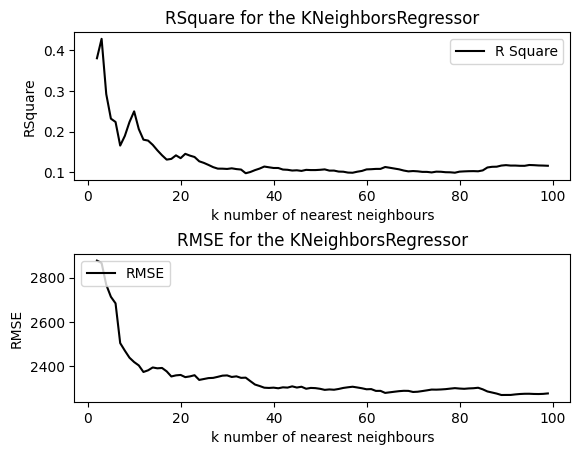

In [79]:
plt.subplot(2, 1, 1)
plt.plot(range(2, 100), rsquare_arr, c='k', label='R Square')
plt.axis('tight')
plt.xlabel('k number of nearest neighbours')
plt.ylabel('RSquare')
plt.legend(loc='upper right')
plt.title("RSquare for the KNeighborsRegressor")
plt.subplots_adjust( hspace=0.5)

plt.subplot(2, 1, 2)
plt.plot(range(2, 100), rmse_arr, c='k', label='RMSE')
plt.axis('tight')
plt.xlabel('k number of nearest neighbours')
plt.ylabel('RMSE')
plt.legend(loc='upper left')
plt.title("RMSE for the KNeighborsRegressor")

Inference of above

As the k value increases, both the r-squared and RMSE values decrease. This suggests that the model is becoming less accurate as the k value increases. This is likely due to the fact that the y value, Wpts, is not well-correlated with the x value, the weight of the winner. Therefore, the model is not able to accurately predict Wpts based on the weight of the winner.

### TASK 3.2

Can we predict the winner of a tennis match using features such as the playing surface, player ranks, and physical characteristics of the players?

In [82]:
merged_data.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'EXW', 'EXL', 'LBW', 'LBL', 'PSW',
       'PSL', 'SJW', 'SJL', 'MaxW', 'MaxL', 'AvgW', 'AvgL', 'OverallSequence',
       'dob_Winner', 'country_Winner', 'height_Winner', 'weight_Winner',
       'plays_Winner', 'age_Loser', 'country_Loser', 'height in cm_Loser',
       'weight in kg_Loser', 'plays_Loser', 'weight_to_height_ratio_Winner',
       'weight_to_height_ratio_Loser', 'BMI_Loser', 'BMI_Winner',
       'age_Winner'],
      dtype='object')

In [90]:
merged_data['Surface'].unique()
surface_map = {'Hard': 1, 'Clay': 2, 'Grass': 3}
merged_data['Surface'] = merged_data['Surface'].map(surface_map)

In [104]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Select the relevant features and target variable
X = merged_data[['Surface']]
y = merged_data['Winner']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.024914765276685024


Based on the very low accuracy score of 2%, it seems that the model is not able to effectively predict the winner based solely on the surface type. This may be because there are many other factors that play a more important role in determining the outcome of a tennis match. Lets add some numerical features as well to check if that improves the model's accuracy.

In [106]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Select the relevant features and target variable
X = merged_data[['Surface','WRank', 'LRank', 'MaxW', 'MaxL','WPts','LPts','Best of','BMI_Loser','BMI_Winner']]
y = merged_data['Winner']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8544453186467349


The increase in accuracy from 2% to 87% is a significant improvement. This suggests that the additional features included in the model, such as player rankings, match stats, and BMI, are important predictors for determining the outcome of a tennis match. Based on this inference, we can conclude that including these features can improve the accuracy of the classification model for predicting tennis match outcomes.

In [109]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics

In [ ]:
km = KMeans(n_clusters=3, init='random')
km.fit(df[['Magnesium','Flavanoids']].values)
predictions = km.predict(df[['Magnesium','Flavanoids']].values)
metrics.silhouette_score(df[['Magnesium','Flavanoids']].values, predictions)

### Task 3.3

Can we cluster tennis players based on their playing style and performance metrics?

In [112]:
columns = ['WRank', 'LPts', 'AvgW', 'AvgL', 'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets']
km = KMeans(n_clusters=3, init='random')
km.fit(merged_data[columns].values)
predictions = km.predict(df[columns].values)
metrics.silhouette_score(df[columns].values, predictions)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7342409629805082

Based on the silhouette score of 0.7, we can say that there is a moderate level of clustering tendency in the tennis player data, indicating that it may be possible to cluster tennis players based on their playing style and performance metrics.

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

Text(0.5, 1.0, 'Within Cluster Sum of Squares versus number of Clusters')

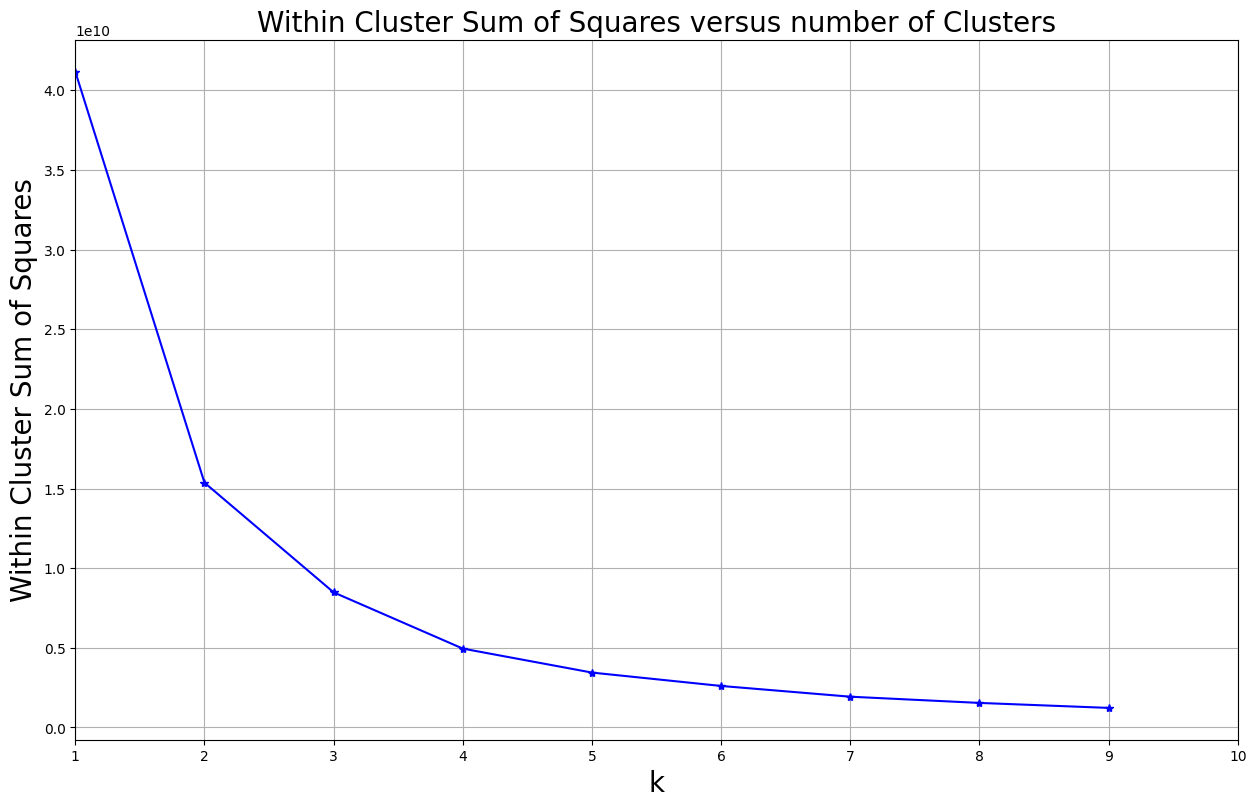

In [113]:
k_rng = range(1,10)
est = [KMeans(n_clusters = k).fit(df[columns].values) for k in k_rng]

# Generally want to minimize WSS, while also minimizing k
within_cluster_sum_squares = [e.inertia_ for e in est]
fig, axes = plt.subplots()
fig.set_size_inches(15,20)
# Plot the results
plt.subplot(212)
plt.plot(k_rng, within_cluster_sum_squares, 'b*-')
plt.xlim([1,10])
plt.grid(True)
plt.xlabel('k', fontsize=20)
plt.ylabel('Within Cluster Sum of Squares', fontsize=20)
plt.title('Within Cluster Sum of Squares versus number of Clusters', fontsize=20)

The drop in the within-cluster sum of squares (WSS) is large between 1,2 and 4, this means that the clusters are becoming more compact and well-defined, which is generally desirable.